In [1]:
import xarray as xr
import numpy as np
import pandas as pd

In [2]:
speeds = xr.open_dataset("data_grib/ABBY_1968_07.grib", engine='cfgrib', backend_kwargs={'filter_by_keys': {'paramId': [165, 166]}})
rainfall = xr.open_dataset("data_grib/ABBY_1968_07.grib", engine='cfgrib', backend_kwargs={'filter_by_keys': {'paramId': [228]}})

In [3]:
speeds = speeds.to_dataframe()

In [4]:
rainfall = rainfall.to_dataframe()

In [5]:
u_speed = speeds.u10
v_speed = speeds.v10

In [6]:
ws10 = np.sqrt(u_speed**2 + v_speed**2)

In [7]:
speeds["ws10"] = ws10

In [8]:
speeds

number   step  surface  \
time                latitude longitude                           
1968-07-01 00:00:00 32.0     -95.00          0 0 days      0.0   
                             -94.75          0 0 days      0.0   
                             -94.50          0 0 days      0.0   
                             -94.25          0 0 days      0.0   
                             -94.00          0 0 days      0.0   
...                                        ...    ...      ...   
1968-07-13 23:00:00 22.0     -71.00          0 0 days      0.0   
                             -70.75          0 0 days      0.0   
                             -70.50          0 0 days      0.0   
                             -70.25          0 0 days      0.0   
                             -70.00          0 0 days      0.0   

                                                valid_time       u10  \
time                latitude longitude                                 
1968-07-01 00:00:00 32.0     -95.00    1968-07-01 00:00:00 -0.594589   
                             -94.75    1968-07-01 00:00:00 -0.535019   
                             -94.50    1968-07-01 00:00:00 -0.560410   
                             -94.25    1968-07-01 00:00:00 -0.657089   
                             -94.00    1968-07-01 00:00:00 -0.680527   
...                                                    ...       ...   
1968-07-13 23:00:00 22.0     -71.00    1968-07-13 23:00:00 -7.938705   
                             -70.75    1968-07-13 23:00:00 -7.774643   
                             -70.50    1968-07-13 23:00:00 -7.506088   
                             -70.25    1968-07-13 23:00:00 -7.310776   
                             -70.00    1968-07-13 23:00:00 -7.191635   

                                             v10      ws10  
time                latitude longitude                      
1968-07-01 00:00:00 32.0     -95.00     3.217911  3.272382  
                             -94.75     3.019669  3.066699  
                             -94.50     2.833145  2.888039  
                             -94.25     2.774551  2.851298  
                             -94.00     2.815567  2.896642  
...                                          ...       ...  
1968-07-13 23:00:00 22.0     -71.00     2.088104  8.208729  
                             -70.75     2.062714  8.043622  
                             -70.50     1.952362  7.755842  
                             -70.25     1.727753  7.512162  
                             -70.00     1.446503  7.335665  

[1291992 rows x 7 columns]

In [9]:
rainfall

number  surface  \
time                step            latitude longitude                    
1968-06-30 18:00:00 0 days 01:00:00 32.0     -95.00          0      0.0   
                                             -94.75          0      0.0   
                                             -94.50          0      0.0   
                                             -94.25          0      0.0   
                                             -94.00          0      0.0   
...                                                        ...      ...   
1968-07-13 18:00:00 0 days 12:00:00 22.0     -71.00          0      0.0   
                                             -70.75          0      0.0   
                                             -70.50          0      0.0   
                                             -70.25          0      0.0   
                                             -70.00          0      0.0   

                                                                valid_time  tp  
time                step            latitude longitude                          
1968-06-30 18:00:00 0 days 01:00:00 32.0     -95.00    1968-06-30 19:00:00 NaN  
                                             -94.75    1968-06-30 19:00:00 NaN  
                                             -94.50    1968-06-30 19:00:00 NaN  
                                             -94.25    1968-06-30 19:00:00 NaN  
                                             -94.00    1968-06-30 19:00:00 NaN  
...                                                                    ...  ..  
1968-07-13 18:00:00 0 days 12:00:00 22.0     -71.00    1968-07-14 06:00:00 NaN  
                                             -70.75    1968-07-14 06:00:00 NaN  
                                             -70.50    1968-07-14 06:00:00 NaN  
                                             -70.25    1968-07-14 06:00:00 NaN  
                                             -70.00    1968-07-14 06:00:00 NaN  

[1341684 rows x 4 columns]

In [10]:
ws10_95_quantile = speeds.ws10.quantile(0.95)
tp_95_quantile = rainfall.tp.quantile(0.95)

In [11]:
print(f"95% quantile for ws10: {ws10_95_quantile}")
print(f"95% quantile for tp: {tp_95_quantile}")

95% quantile for ws10: 7.907463288307189
95% quantile for tp: 0.000926971435546875


In [13]:
# Identify locations where either variables are below the thresholds
mask_ws10 = speeds['ws10'] > ws10_95_quantile
mask_tp = rainfall['tp'] > tp_95_quantile
#combined_mask = mask_ws10 | mask_tp

In [14]:
sum(mask_ws10)

64600

In [15]:
#Finding the coordinates that experience weather above the thresholds at some point

temp = mask_ws10.groupby(["latitude", "longitude"]).sum()
mask_ws10_average = temp > 0

temp = mask_tp.groupby(["latitude", "longitude"]).sum()
mask_tp_average = temp > 0

In [16]:
print(rainfall.tp.shape)
print(speeds.ws10.shape)

(1341684,)
(1291992,)


In [17]:
import matplotlib.pyplot as plt
import seaborn as sns

In [18]:
#Averaging wind speed and tp over time

ws10_average = speeds["ws10"].groupby(["latitude", "longitude"]).mean()
tp_average = rainfall["tp"].groupby(["latitude", "longitude"]).mean()

In [19]:
ws10_average

latitude  longitude
22.0      -95.00       4.815142
          -94.75       4.829640
          -94.50       4.854712
          -94.25       4.891625
          -94.00       4.931807
                         ...   
32.0      -71.00       3.276431
          -70.75       3.213308
          -70.50       3.168251
          -70.25       3.114270
          -70.00       3.050466
Name: ws10, Length: 4141, dtype: float32

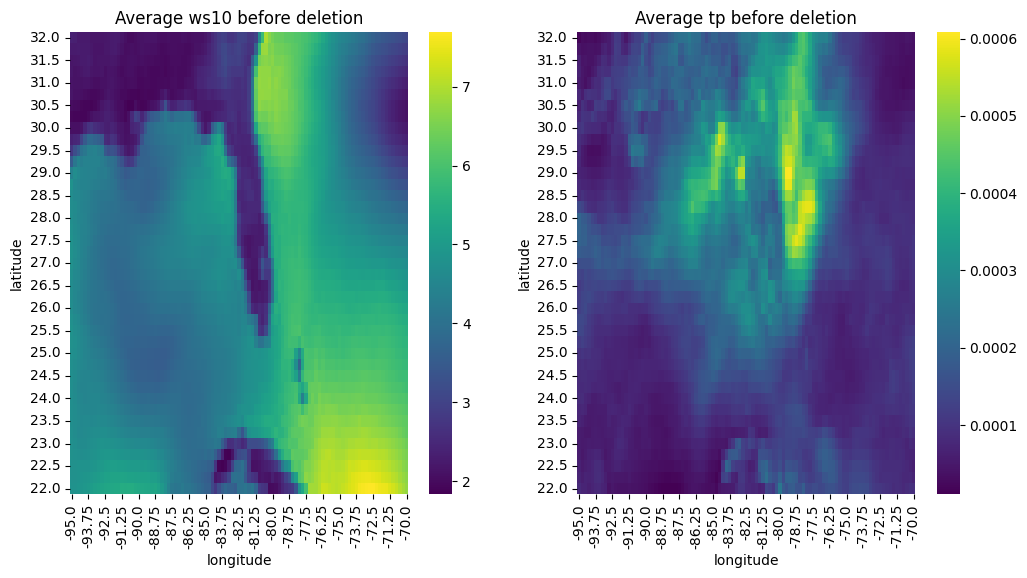

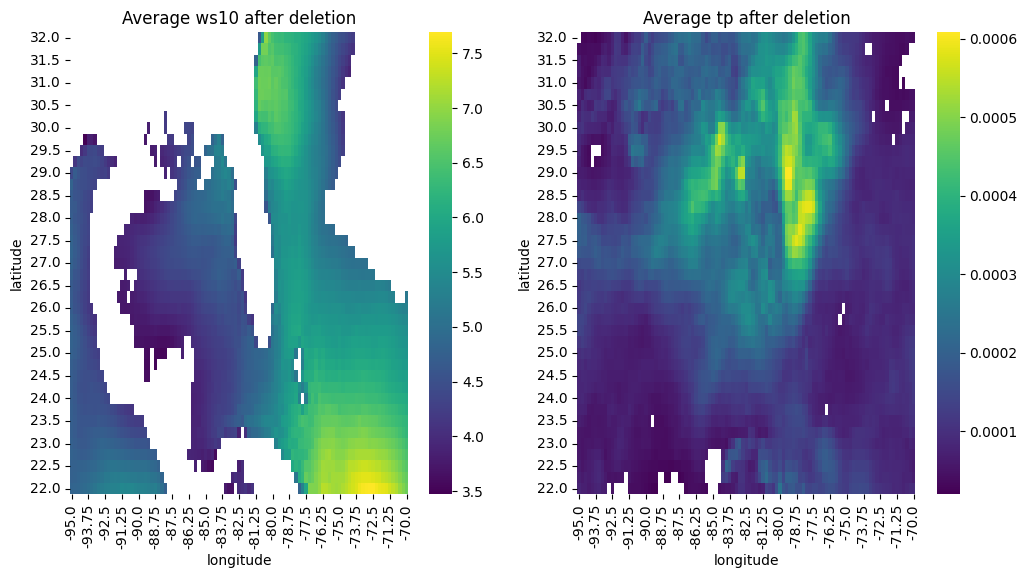

In [20]:
# Plot data before deletion
plt.figure(figsize=(12, 6))
plt.subplot(121)
sns.heatmap(ws10_average.unstack(), cmap='viridis')
plt.gca().invert_yaxis()
plt.title('Average ws10 before deletion')

plt.subplot(122)
sns.heatmap(tp_average.unstack(), cmap='viridis')
plt.gca().invert_yaxis()
plt.title('Average tp before deletion')
plt.show()

# Apply the mask and remove data from locations below thresholds
ws10_filtered = ws10_average.where(mask_ws10_average)
tp_filtered = tp_average.where(mask_tp_average)

# Plot data after deletion
plt.figure(figsize=(12, 6))
plt.subplot(121)
sns.heatmap(ws10_filtered.unstack(), cmap='viridis')
plt.gca().invert_yaxis()
plt.title('Average ws10 after deletion')

plt.subplot(122)
sns.heatmap(tp_filtered.unstack(), cmap='viridis')
plt.gca().invert_yaxis()
plt.title('Average tp after deletion')
plt.show()

In the previous example, they masked before taking the average. So a point which e.g has 0.96,0.9,0.9,.... quantile of wind speed, the average would be taken over 0.96, 0 ,0, which i dont think is a good idea. Instead I took the averages and then masked over coordinates which experienced at at least one point wind speed above the 95% quantile.

In [209]:
#Combining the masks

combined_mask = mask_ws10_average & mask_tp_average

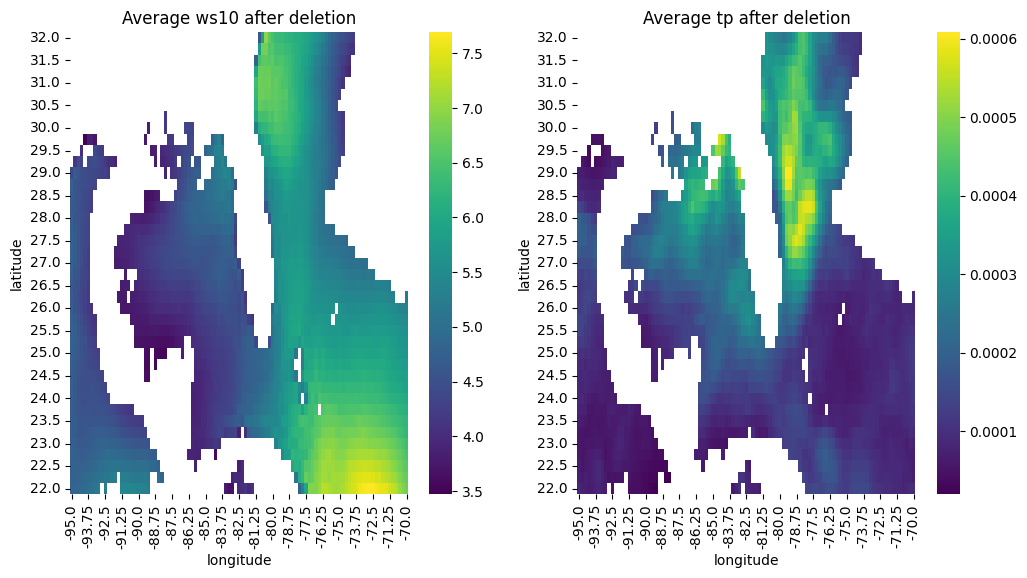

In [210]:
# Apply the mask and remove data from locations below thresholds
ws10_filtered_combined = ws10_average.where(combined_mask)
tp_filtered_combined = tp_average.where(combined_mask)

# Plot data after deletion
plt.figure(figsize=(12, 6))
plt.subplot(121)
sns.heatmap(ws10_filtered_combined.unstack(), cmap='viridis')
plt.gca().invert_yaxis()
plt.title('Average ws10 after deletion')

plt.subplot(122)
sns.heatmap(tp_filtered_combined.unstack(), cmap='viridis')
plt.gca().invert_yaxis()
plt.title('Average tp after deletion')
plt.show()

Extra Features

In [214]:
extra = xr.open_dataset("data_grib/ABBY_1968_07.grib", engine='cfgrib', backend_kwargs={'filter_by_keys': {'paramId': [134, 34]}})

In [215]:
extra = extra.to_dataframe()
extra

number   step  surface  \
time                latitude longitude                           
1968-07-01 00:00:00 32.0     -95.00          0 0 days      0.0   
                             -94.75          0 0 days      0.0   
                             -94.50          0 0 days      0.0   
                             -94.25          0 0 days      0.0   
                             -94.00          0 0 days      0.0   
...                                        ...    ...      ...   
1968-07-13 23:00:00 22.0     -71.00          0 0 days      0.0   
                             -70.75          0 0 days      0.0   
                             -70.50          0 0 days      0.0   
                             -70.25          0 0 days      0.0   
                             -70.00          0 0 days      0.0   

                                                valid_time           sp  \
time                latitude longitude                                    
1968-07-01 00:00:00 32.0     -95.00    1968-07-01 00:00:00  100204.5000   
                             -94.75    1968-07-01 00:00:00  100182.5000   
                             -94.50    1968-07-01 00:00:00  100410.5000   
                             -94.25    1968-07-01 00:00:00  100636.5000   
                             -94.00    1968-07-01 00:00:00  100787.5000   
...                                                    ...          ...   
1968-07-13 23:00:00 22.0     -71.00    1968-07-13 23:00:00  101933.3125   
                             -70.75    1968-07-13 23:00:00  101952.3125   
                             -70.50    1968-07-13 23:00:00  101936.3125   
                             -70.25    1968-07-13 23:00:00  101931.3125   
                             -70.00    1968-07-13 23:00:00  101952.3125   

                                               sst  
time                latitude longitude              
1968-07-01 00:00:00 32.0     -95.00            NaN  
                             -94.75            NaN  
                             -94.50            NaN  
                             -94.25            NaN  
                             -94.00            NaN  
...                                            ...  
1968-07-13 23:00:00 22.0     -71.00     301.380371  
                             -70.75     301.373535  
                             -70.50     301.286621  
                             -70.25     301.172363  
                             -70.00     301.103027  

[1291992 rows x 6 columns]

In [216]:
sp_average = extra["sp"].groupby(["latitude", "longitude"]).mean()
sst_average = extra["sst"].groupby(["latitude", "longitude"]).mean()

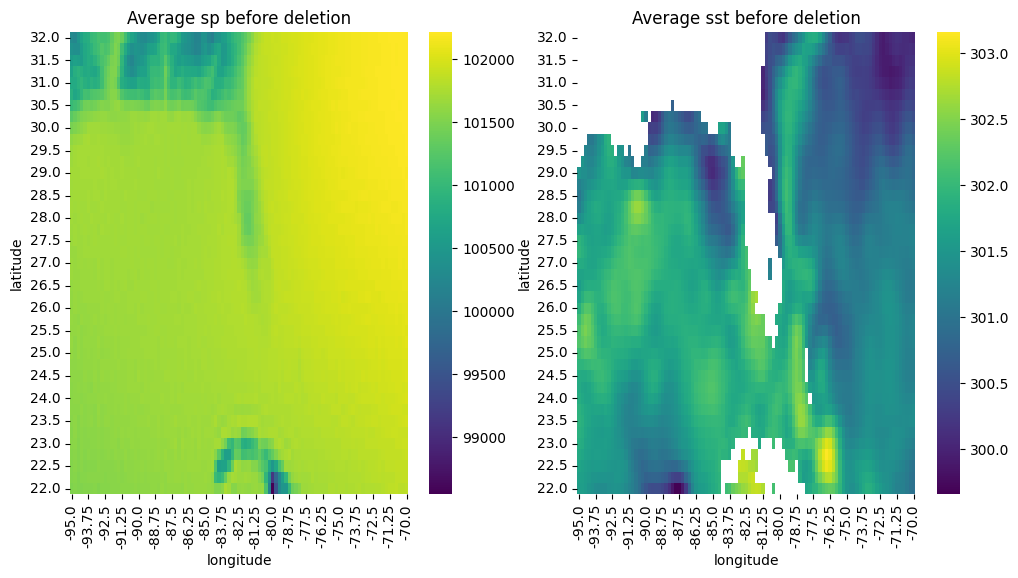

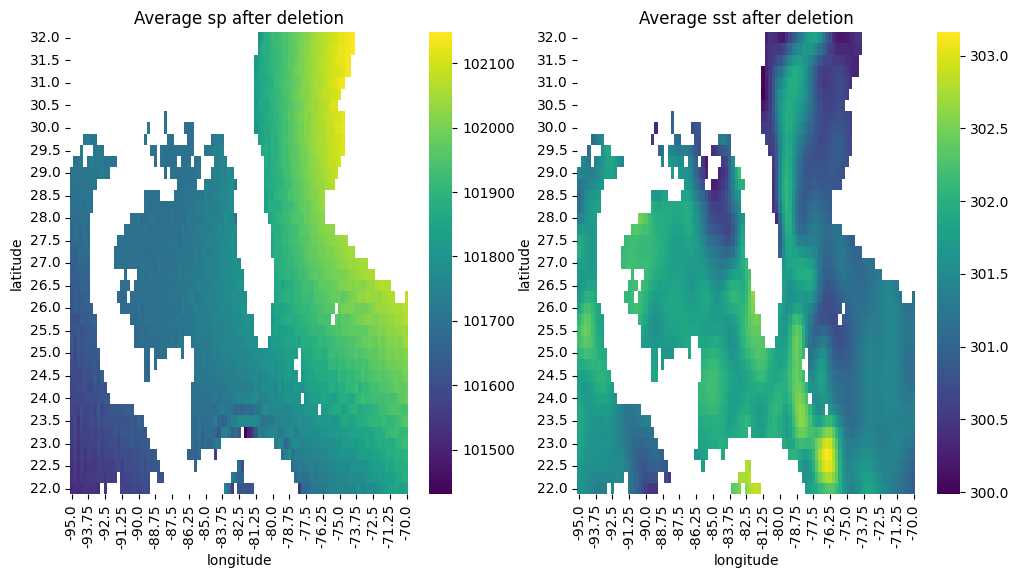

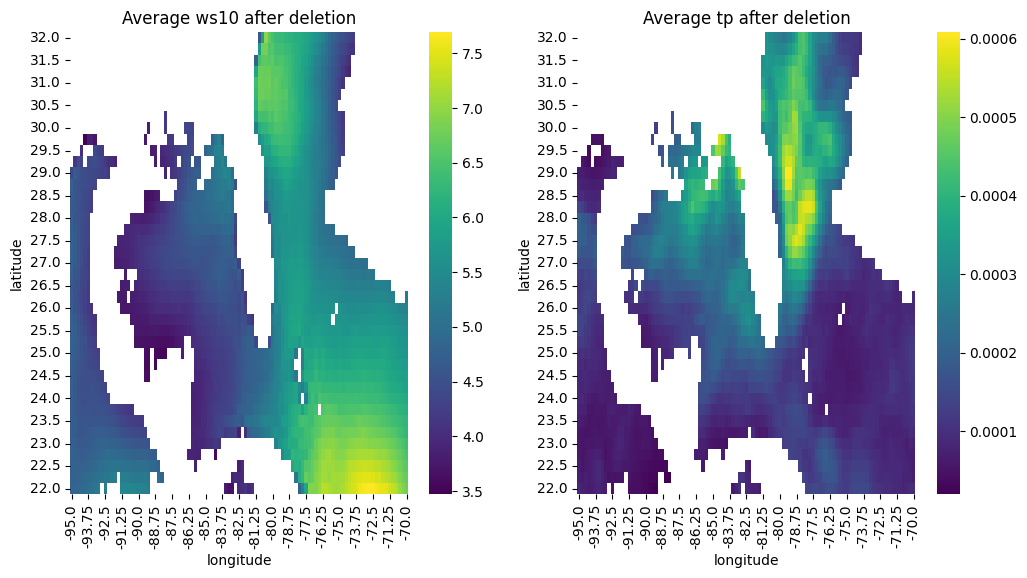

In [219]:
# Plot data before deletion
plt.figure(figsize=(12, 6))
plt.subplot(121)
sns.heatmap(sp_average.unstack(), cmap='viridis')
plt.gca().invert_yaxis()
plt.title('Average sp before deletion')

plt.subplot(122)
sns.heatmap(sst_average.unstack(), cmap='viridis')
plt.gca().invert_yaxis()
plt.title('Average sst before deletion')
plt.show()

# Apply the mask and remove data from locations below thresholds
sp_filtered = sp_average.where(combined_mask)
sst_filtered = sst_average.where(combined_mask)

# Plot data after deletion
plt.figure(figsize=(12, 6))
plt.subplot(121)
sns.heatmap(sp_filtered.unstack(), cmap='viridis')
plt.gca().invert_yaxis()
plt.title('Average sp after deletion')

plt.subplot(122)
sns.heatmap(sst_filtered.unstack(), cmap='viridis')
plt.gca().invert_yaxis()
plt.title('Average sst after deletion')
plt.show()

# Plot data after deletion
plt.figure(figsize=(12, 6))
plt.subplot(121)
sns.heatmap(ws10_filtered_combined.unstack(), cmap='viridis')
plt.gca().invert_yaxis()
plt.title('Average ws10 after deletion')

plt.subplot(122)
sns.heatmap(tp_filtered_combined.unstack(), cmap='viridis')
plt.gca().invert_yaxis()
plt.title('Average tp after deletion')
plt.show()